# DEMIX Wine Contest - histograms (from MicroDEM to Python)

notebook by Carlos H Grohmann (Univ. São Paulo, Brazil)  
version 2023-01-10

This notebook was developed within the DEMIX project  
(DEMIX: Digital Elevation Model Intercomparison eXperiment)  
more information here: https://ceos.org/ourwork/workinggroups/wgcv/current-activites/  

This notebook is just to make the histograms, since they were originally made in MicroDEM  
and we want all the figures to have the same look

P.Guth exported the histogram files as CSV and we are using them here

In [1]:
# run this to get cells as wide as your browser (optional, but really helps to visualize the dataframe)
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### Basics. Import libraries, etc

In [44]:
# ------------------------------------------------------------------------------
# ---------------------------     IMPORTS      ---------------------------------
# ------------------------------------------------------------------------------
# imports - general
import sys,os
import itertools
import json
import pandas as pd
import numpy as np

sys.path.append('.')
from IPython.display import display, HTML

#imports - plotting
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.colors

# ------------------------------------------------------------------------------
# set data directories
root_dir = '.'
hists_dir = f'{root_dir}/csv_files/difference_distributions_csv'


dem_order = ['ALOS','COP','FABDEM','NASA','SRTM','ASTER']
dem_order_rank = [i+'_rank' for i in dem_order]

dem_color = ['#E69F00','#56B4E9','#CC79A7','#009E73','#D55E00','#0072B2']
dem_clr_pltt = sns.color_palette(dem_color, len(dem_color))
dem_clr_dict = dict(zip(dem_order, dem_color))

In [66]:
ref_list = ['DSM','DTM']
tiles_list = ['N28XW018B','N59TE009G','N43PW002B']#'N36XW003D']
areas_list = ['laPalma','norway','almeria']
param_list = ['elev','slope','ruff']
dem_list = ['ALOS','COP','FABDEM','NASA','SRTM','ASTER']

In [67]:
def plot_hists(tile,ref_list,param_list,dem_list,hists_dir):
    ''' plot the histogram from P.G. CSV files'''
    grid_kws = {'width_ratios': (0.3, 0.3, 0.3), 'wspace': 0.05} # size of subplots
    fig, axes = plt.subplots(2, 3, gridspec_kw=grid_kws,figsize=(20,15), sharey='row')
    fname = f'hists_diff_{tile}.svg'
    i = 0
    for ref in ref_list:
        for param in param_list:
            fdir = f'{hists_dir}/{param}_diff_hists'
            ax = axes.flatten()[i]
            # print(f'ref={ref}, param={param}, i={i}, dir={fdir}')
            lines_df = pd.DataFrame()
            for dem in dem_list:
                zfile = f'{fdir}/{dem}_to_{ref}-{tile}.csv'
                pd_zfile = pd.read_csv(zfile)
                pd_zfile['dem'] = dem
                ax.plot(pd_zfile['x'], pd_zfile['y'], c=dem_clr_dict[dem], label=dem)
                ax.legend()
                ax.set_title(f'tile={tile}, ref={ref}, param={param}')
            i+=1
    plt.savefig(fname, dpi=300) 


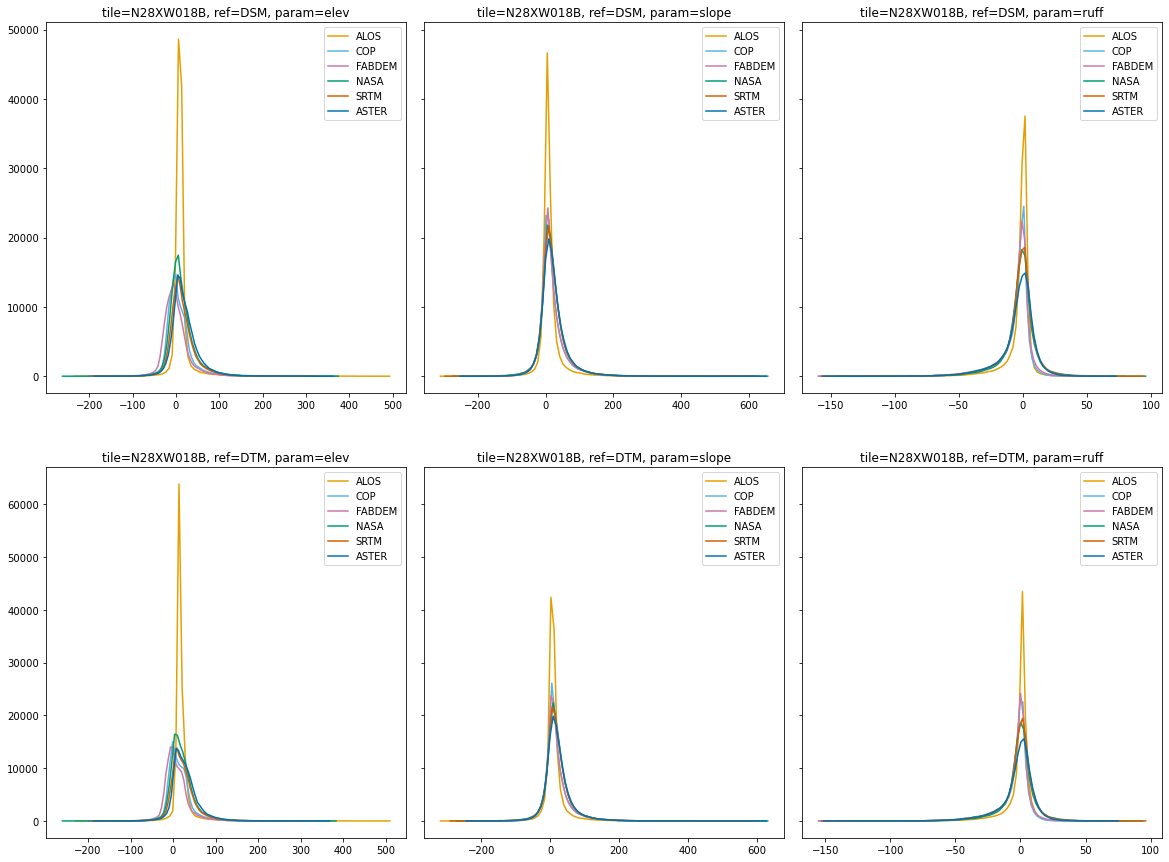

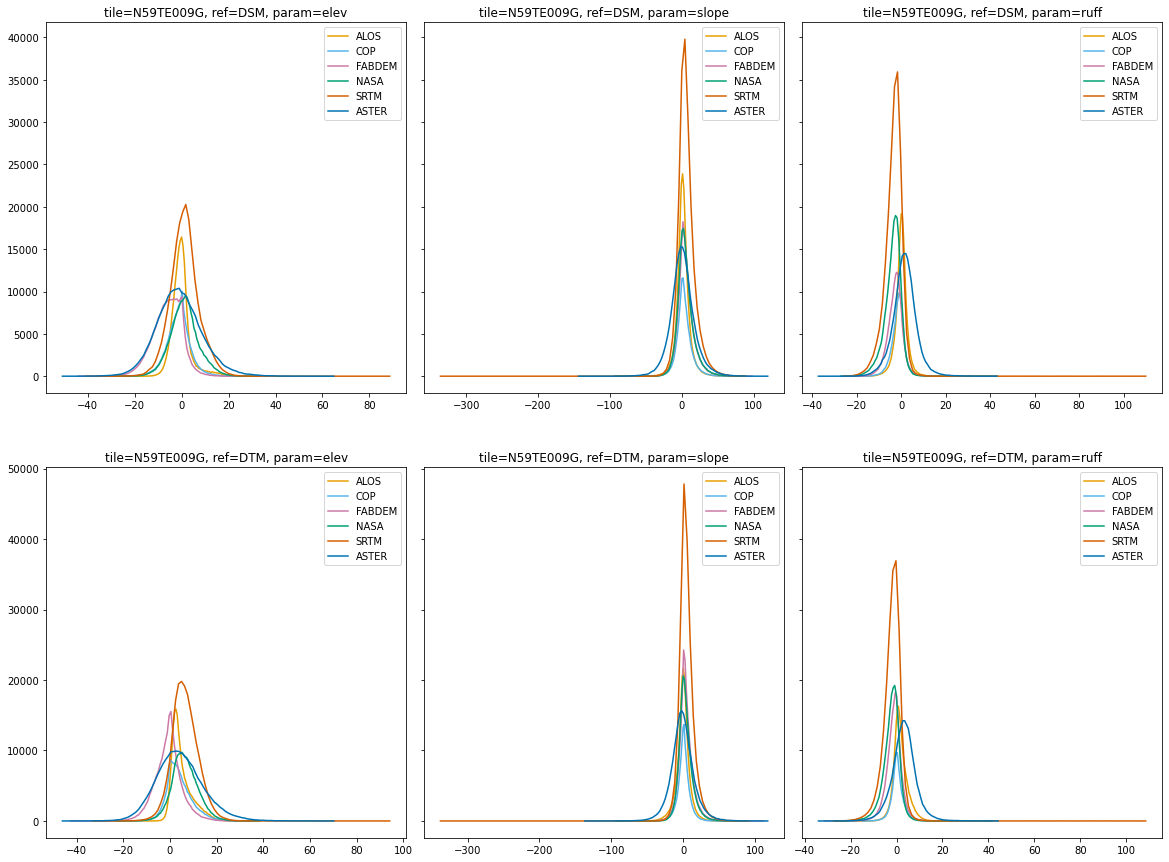

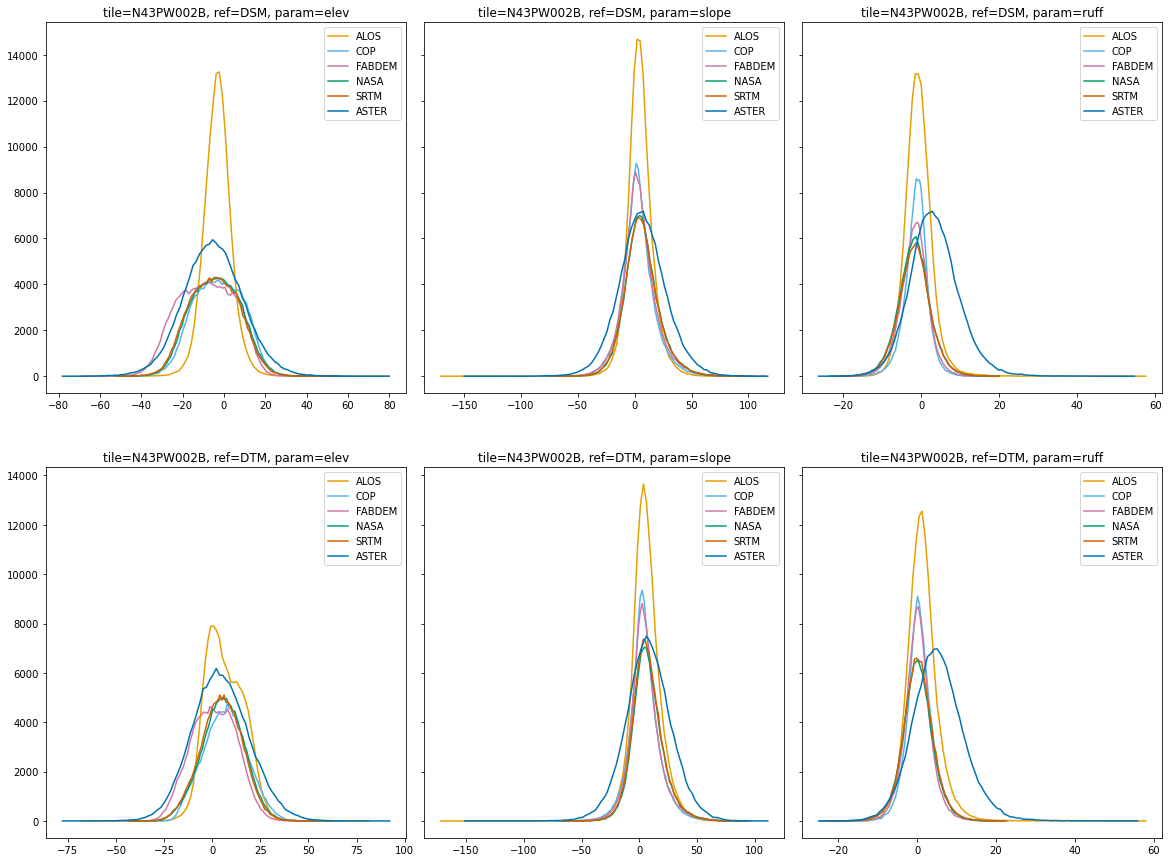

In [68]:
for tile in tiles_list:
    plot_hists(tile,ref_list,param_list,dem_list,hists_dir)